In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import DirectoryIterator
from tensorflow import optimizers


scaler = ImageDataGenerator(rescale=1./255, validation_split=0.15)


#Smaller dataset
'''
print('Loading Validation set...')
val = DirectoryIterator('val/',scaler, target_size=(144,192),color_mode='grayscale', seed=1,  batch_size=50)
print('Loading Validation set...')
test = DirectoryIterator('test/',scaler, target_size=(144,192),color_mode='grayscale', seed=1,  batch_size=50)
print('Loading Validation set...')
train = DirectoryIterator('train/',scaler, target_size=(144,192),color_mode='grayscale', seed=1,  batch_size=50)
'''

print("Loading full set...\n")
#Training and Validation sets ceom from the same 
print('Loading Training Set')
train = DirectoryIterator('full/',scaler, target_size=(224,224),color_mode='rgb', seed=1,  batch_size=50)
print('Loading Validation Set')
val = DirectoryIterator('fullval/',scaler, target_size=(224,224),color_mode='rgb', seed=1,  batch_size=50)
print('Loading Testing Set')
test = DirectoryIterator('fulltest/',scaler, target_size=(224,224),color_mode='rgb', seed=1,  batch_size=50)


print('Loaded Images')

Loading full set...

Loading Training Set
Found 15585 images belonging to 2 classes.
Loading Validation Set
Found 3540 images belonging to 2 classes.
Loading Testing Set
Found 3299 images belonging to 2 classes.
Loaded Images


In [2]:
print("Num GPU's Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPU's Available:  1


Sample training input

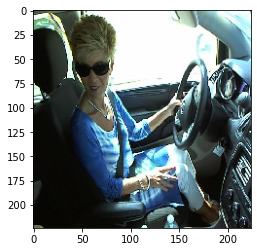

In [3]:
pyplot.imshow(train[1][0][0])
pyplot.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

VGG based architecture for CNN

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),padding = 'same'))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,3),padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(256,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'adam' ,metrics=['accuracy'])



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       7

In [7]:
model.fit(train, epochs=4, validation_data=val)

Epoch 1/4
312/312 [==============================] - 103s 313ms/step - loss: 0.5447 - accuracy: 0.7339 - val_loss: 1.6542 - val_accuracy: 0.5613
Epoch 2/4
312/312 [==============================] - 90s 289ms/step - loss: 0.1556 - accuracy: 0.9399 - val_loss: 0.9597 - val_accuracy: 0.6791
Epoch 3/4
312/312 [==============================] - 91s 290ms/step - loss: 0.0742 - accuracy: 0.9720 - val_loss: 4.0792 - val_accuracy: 0.5268
Epoch 4/4
312/312 [==============================] - 89s 285ms/step - loss: 0.0565 - accuracy: 0.9789 - val_loss: 2.6742 - val_accuracy: 0.5774


In [8]:
model.evaluate(test)

66/66 [==============================] - 19s 287ms/step - loss: 5.2527 - accuracy: 0.5020


[5.252697467803955, 0.5019702911376953]

In [9]:
generator = ImageDataGenerator(rescale=1./255,rotation_range=20, width_shift_range=0.2,height_shift_range=0.2, zoom_range=0.2)
augmentor = generator.flow_from_directory('full/', target_size=(224,224), color_mode = 'rgb', batch_size=50) 

Found 15585 images belonging to 2 classes.


In [10]:
model.fit(augmentor, epochs=4,validation_data=val)

Epoch 1/4
312/312 [==============================] - 236s 756ms/step - loss: 0.7342 - accuracy: 0.4975 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 2/4
312/312 [==============================] - 232s 743ms/step - loss: 0.6926 - accuracy: 0.5096 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/4
312/312 [==============================] - 233s 745ms/step - loss: 0.6785 - accuracy: 0.5367 - val_loss: 0.6617 - val_accuracy: 0.5565
Epoch 4/4
312/312 [==============================] - 231s 739ms/step - loss: 0.6610 - accuracy: 0.5672 - val_loss: 0.6272 - val_accuracy: 0.6000


In [11]:
model.evaluate(test)

66/66 [==============================] - 16s 242ms/step - loss: 0.6467 - accuracy: 0.6132


[0.6467239260673523, 0.6132161021232605]